# Imports de modules

In [30]:
from scipy import stats
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [31]:
# scipy.stats.wilcoxon(x, y=None, zero_method='wilcox', correction=False)

In [32]:
# scipy.stats.mannwhitneyu(x, y, use_continuity=True, alternative=None)

# Liste des mesures (quantitatives et qualitatives)

In [33]:
m_quanti = [
#  'Toni_diaph',
 'Toni_diaph_G',
 'Toni_diaph_D',
 'Toni_diaph_Ec',
 'Endu_exten',
 'Endu_flech',
 'Bernem',
 'Incli_D',
 'Incli_G',
 'Rota_D',
 'Rota_G',
 'Flexi',
 'Exten']
m_quali = [
 'Type_respi',
 'Type_diaph',
]

# Acquisition et mise en forme des données

In [34]:
df = pd.read_csv('Data_DB_Organized.csv', sep = ';') #, encoding = "utf8")
# df = pd.read_csv('D0.csv', sep = '\t') #, encoding = "utf8")
print(df.head(2))
# df.dtypes
print(df.columns)

  Patient Groupe  EVA_Pr  EVA_Mi  EVA_Po1  EVA_Po2  age  Taille  Poids  \
0      FL     KT       5       3        0        1   22     159   50.0   
1      BL     KT       5       2        0        0   21     168   62.0   

         BMI  ... Rota_G_Po2 Rota_D_Po2 Flexi_Pr Flexi_Mi Flexi_Po1 Flexi_Po2  \
0  19.777699  ...         82         81       77       78        82        79   
1  21.967120  ...         94         90       63       98        80        88   

  Exten_Pr Exten_Mi  Exten_Po1  Exten_Po2  
0       68       70         70         71  
1       47       57         65         69  

[2 rows x 74 columns]
Index(['Patient', 'Groupe', 'EVA_Pr', 'EVA_Mi', 'EVA_Po1', 'EVA_Po2', 'age',
       'Taille', 'Poids', 'BMI', 'Type_respi_Pr', 'Type_respi_Mi',
       'Type_respi_Po1', 'Type_respi_Po2', 'Type_diaph_Pr', 'Type_diaph_Mi',
       'Type_diaph_Po1', 'Type_diaph_Po2', 'Toni_diaph_max_Pr',
       'Toni_diaph_max_Mi', 'Toni_diaph_max_Po1', 'Toni_diaph_max_Po2',
       'Toni_diaph_in

# Analyse données brutes

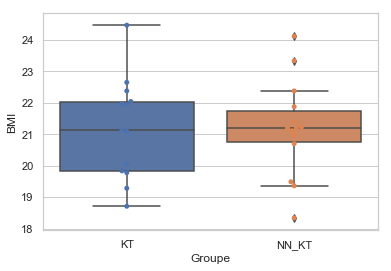

In [35]:
sns.set(style="whitegrid")
# tips = sns.load_dataset("tips")
val = 'BMI'
ax = sns.boxplot(data = df, x = "Groupe", y = val)
ax = sns.swarmplot(data = df, x = "Groupe", y = val)

# Test de Mann-Whitney
## "2 échantillons proviennent-ils de la même population ?"

In [36]:
#  scipy.stats.mannwhitneyu(x, y, use_continuity=True, alternative=None)

In [37]:
df_KT = df[ df['Groupe'] == 'KT']
df_NN_KT = df[ df['Groupe'] == 'NN_KT']

In [38]:
dic = {}
for test in ['_Pr', '_Po1']:
    U_stats = []
    pvalues = []
    for m in m_quanti:
        U_stat, pvalue = stats.mannwhitneyu(x = df_KT[m + test], y = df_NN_KT[m + test])#, use_continuity=True, alternative=None)
        U_stats.append(U_stat)
        pvalues.append(round(pvalue, 3))
    dic.update({'U_stat' + test : U_stats, 'pvalue' + test : pvalues})
u_df = pd.DataFrame(dic, index = m_quanti)
u_df
# u_df[['pvalue_Pr', 'pvalue_Po1']]

,U_stat_Pr,pvalue_Pr,U_stat_Po1,pvalue_Po1
Toni_diaph_G,82.0,0.307,62.0,0.060
Toni_diaph_D,79.0,0.219,61.5,0.046
Toni_diaph_Ec,69.0,0.085,73.5,0.166
Endu_exten,74.5,0.219,75.0,0.226
Endu_flech,68.5,0.142,51.5,0.029
Bernem,63.5,0.094,45.5,0.014
Incli_D,71.5,0.177,76.0,0.239
Incli_G,65.0,0.107,66.0,0.117
Rota_D,89.0,0.471,82.0,0.339
Rota_G,77.0,0.256,76.0,0.240


# Test de WilCoxon
## "Une même population a-t-elle évolué ?"

In [39]:
stats.wilcoxon(x, y = None, zero_method='wilcox', correction=False)

NameError: name 'x' is not defined

In [40]:
dic = {}
for groupe in ['KT', 'NN_KT']:
    df_gr = df[ df['Groupe'] == groupe]

    for test in ['_Mi', '_Po1', '_Po2']:
        Ts = []
        pvalues = []
        for m in m_quanti:
    #         U_stat, pvalue = stats.mannwhitneyu(x = df_KT[m + test], y = df_NN_KT[m + test])#, use_continuity=True, alternative=None)
            T, pvalue = stats.wilcoxon(x = df_gr[m + test], y = df_gr[m + '_Pr']) # zero_method='wilcox', correction=False)
            Ts.append(T)
            pvalues.append(round(pvalue, 3))
        dic.update({'T' + test : Ts, 'pvalue' + test : pvalues})
    u_df = pd.DataFrame(dic, index = m_quanti)
    print(u_df)
    # u_df[['pvalue_Pr', 'pvalue_Po1']]

               T_Mi  pvalue_Mi  T_Po1  pvalue_Po1  T_Po2  pvalue_Po2
Toni_diaph_G    2.5      0.317    0.0       0.004    4.0       0.013
Toni_diaph_D    0.0      0.083    0.0       0.002    0.0       0.003
Toni_diaph_Ec   2.0      0.564   12.0       0.705   12.0       0.705
Endu_exten      6.5      0.006    3.0       0.003    2.0       0.002
Endu_flech     17.5      0.050    5.0       0.005    5.0       0.005
Bernem          0.0      0.001    0.0       0.001    0.0       0.001
Incli_D        19.5      0.068    4.5       0.011    7.5       0.008
Incli_G        34.0      0.419   25.0       0.151   17.5       0.050
Rota_D         17.0      0.046    9.0       0.011    6.0       0.006
Rota_G          8.5      0.010    4.5       0.007    6.0       0.009
Flexi          34.0      0.419   17.5       0.090   27.5       0.208
Exten          28.5      0.235   20.5       0.080   23.0       0.115
               T_Mi  pvalue_Mi  T_Po1  pvalue_Po1  T_Po2  pvalue_Po2
Toni_diaph_G    0.0      0.025    

C:\Users\marti\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2778: UserWarning: Warning: sample size too small for normal approximation.
  warnings.warn("Warning: sample size too small for normal approximation.")
C:\Users\marti\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2778: UserWarning: Warning: sample size too small for normal approximation.
  warnings.warn("Warning: sample size too small for normal approximation.")
C:\Users\marti\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2778: UserWarning: Warning: sample size too small for normal approximation.
  warnings.warn("Warning: sample size too small for normal approximation.")
C:\Users\marti\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2778: UserWarning: Warning: sample size too small for normal approximation.
  warnings.warn("Warning: sample size too small for normal approximation.")
C:\Users\marti\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2778: UserWarning: Warning: sample size too small fo

In [41]:
# df['diff'] = df['R1_0'] - df['R1_1']

In [42]:
# stats.wilcoxon(x = df['diff'], zero_method='wilcox', correction=False)

In [43]:
https://pythonfordatascience.org/wilcoxon-sign-ranked-test-python/

SyntaxError: invalid syntax (<ipython-input-43-a54614e9dfe9>, line 1)

# Evolutions des mesures
## "Comment évoluent les grandeurs mesurées au cours des tests ?""

In [44]:
df.head()

,Patient,Groupe,EVA_Pr,EVA_Mi,EVA_Po1,EVA_Po2,age,Taille,Poids,BMI,...,Rota_G_Po2,Rota_D_Po2,Flexi_Pr,Flexi_Mi,Flexi_Po1,Flexi_Po2,Exten_Pr,Exten_Mi,Exten_Po1,Exten_Po2
0,FL,KT,5,3,0,1,22,159,50.0,19.777699,...,82,81,77,78,82,79,68,70,70,71
1,BL,KT,5,2,0,0,21,168,62.0,21.967120,...,94,90,63,98,80,88,47,57,65,69
2,BN,KT,3,3,1,1,22,173,60.0,20.047446,...,89,91,70,59,65,69,85,80,81,82
3,GC,KT,4,2,1,0,24,174,64.0,21.138856,...,91,93,83,85,86,78,68,69,70,71
4,DA,KT,8,5,3,3,25,165,60.0,22.038567,...,78,80,53,42,47,51,52,44,66,69


In [87]:
tests = ['Pr', 'Mi', 'Po1', 'Po2']

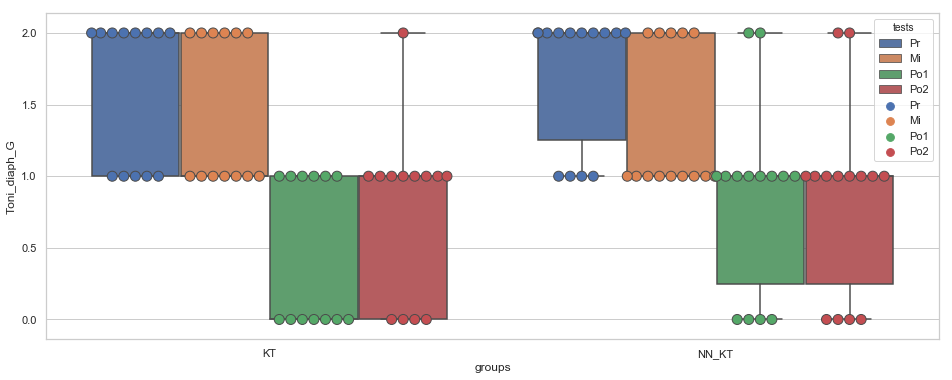

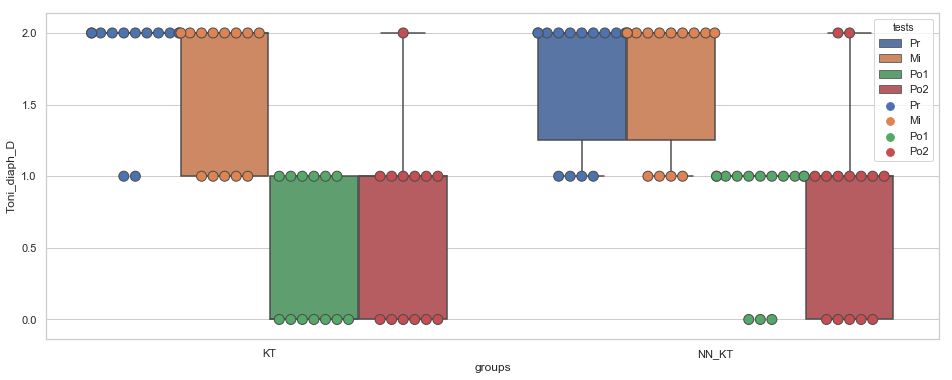

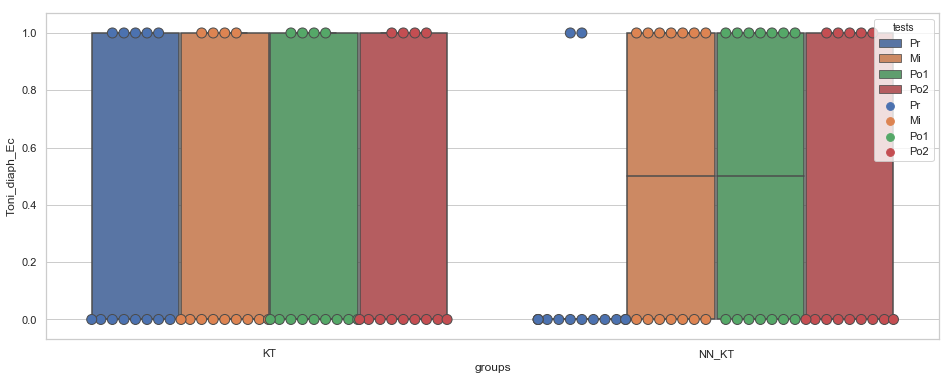

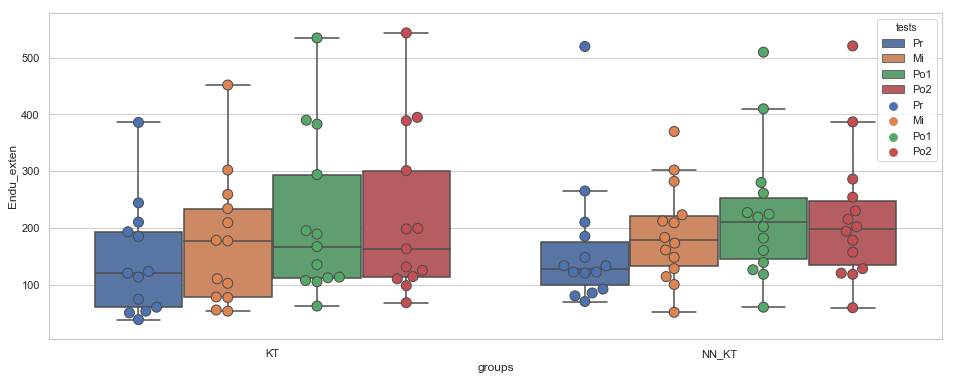

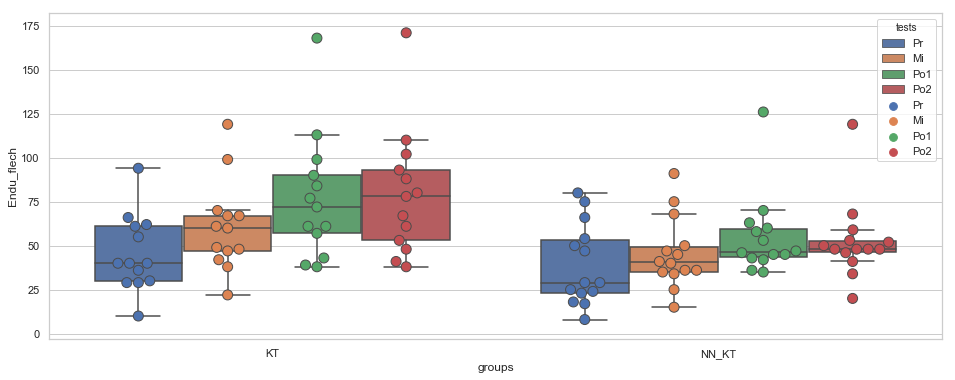

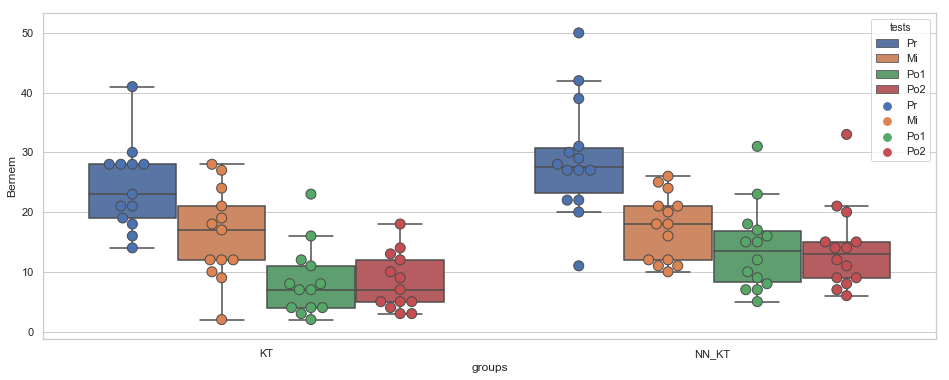

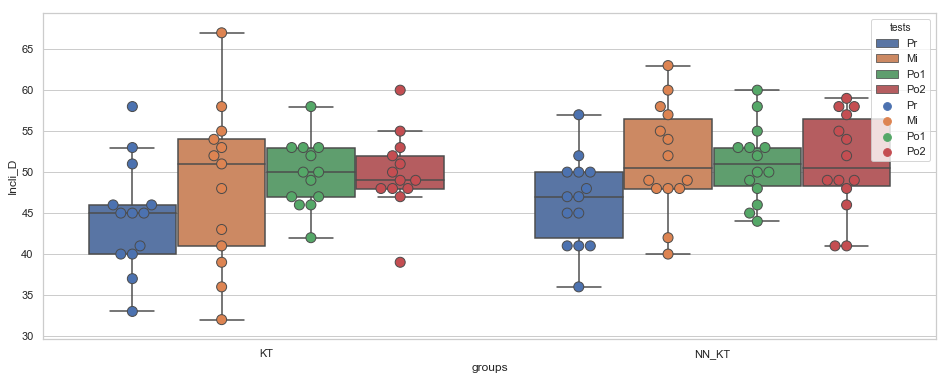

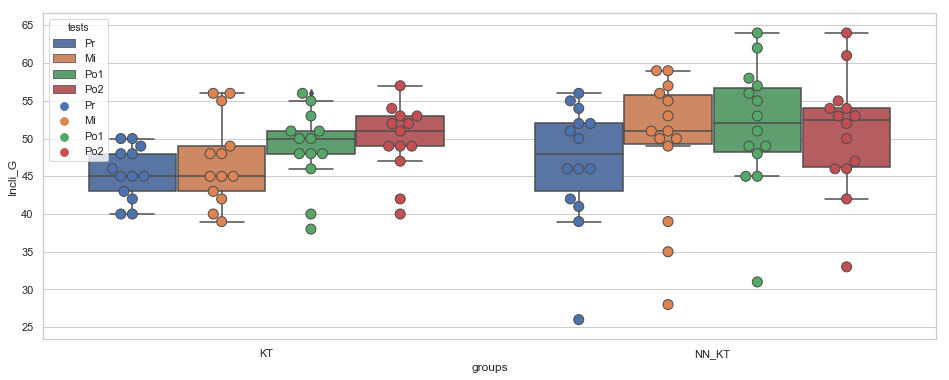

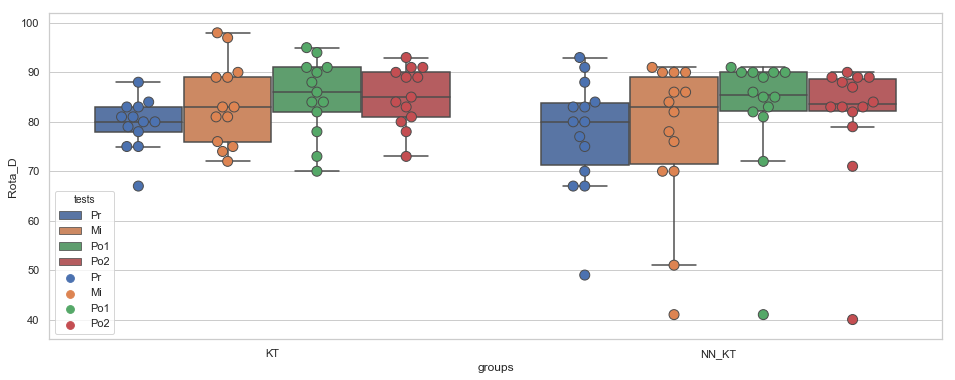

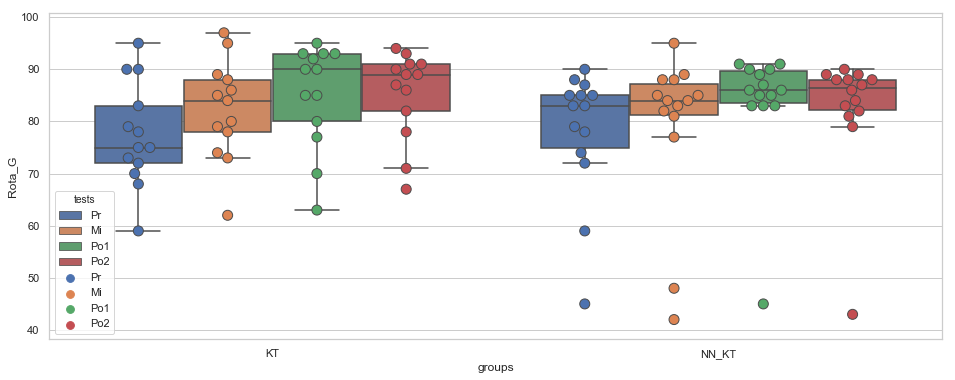

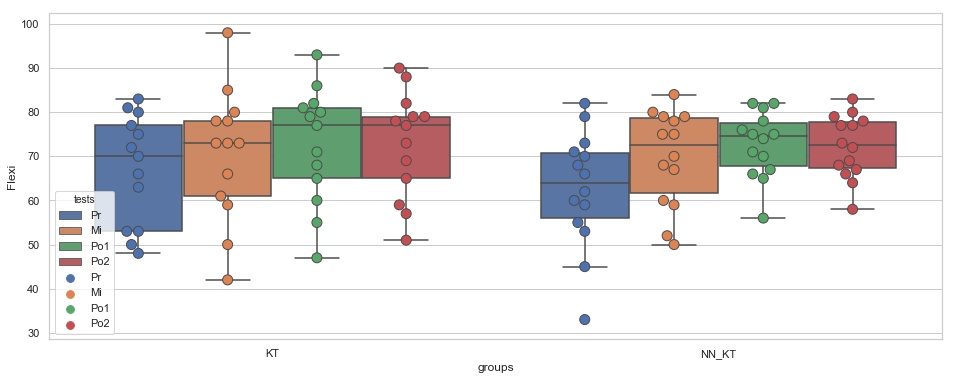

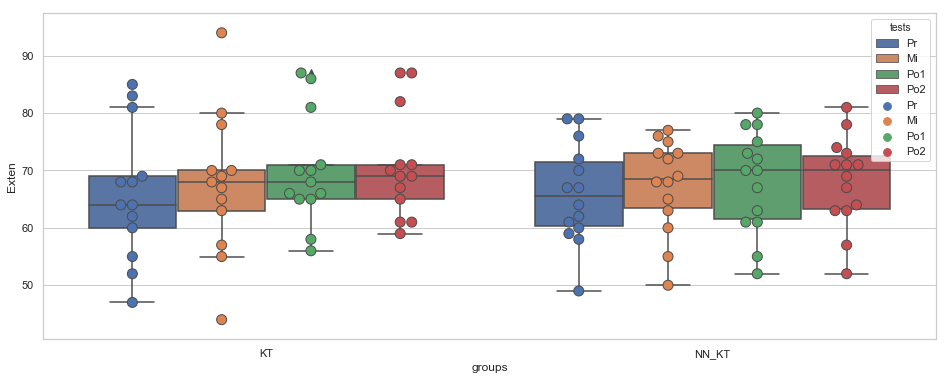

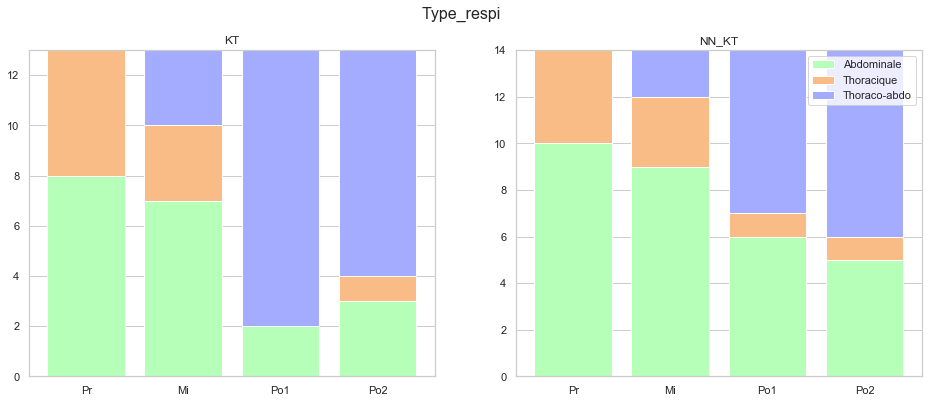

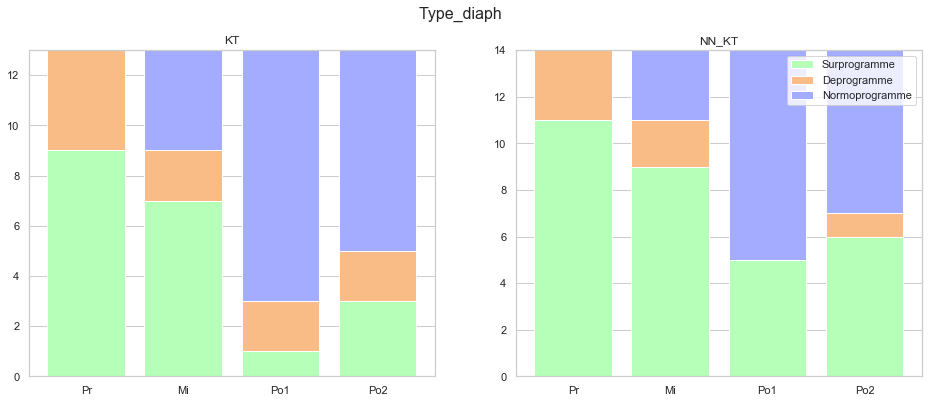

In [132]:
import numpy as np

vars_plot_list = m_quanti[:]
vars_plot_list = m_quali[:]

vars_plot_list = m_quanti + m_quali

Quali_Vars_Infos_dic = {}
Quali_Vars_Infos_dic['Type_respi'] = ['Abdominale', 'Thoracique', 'Thoraco-abdo']
Quali_Vars_Infos_dic['Type_diaph'] = ['Surprogramme', 'Deprogramme', 'Normoprogramme']
colors = ['#b5ffb9', '#f9bc86', '#a3acff']

for m in vars_plot_list:

    dic_m = {m : [], 'tests' : [], 'groups' : []}
    for test in tests: #Pour chacun des tests
        for i, serie in df.iterrows(): #Pour chaque ligne du dataframe
            dic_m[m].append(serie[m + '_' + test]) # Ajout de la valeur de la variable a la liste m du dic
            dic_m['tests'].append(test) # Ajout de la designation du test a la liste 'tests' du dic
            dic_m['groups'].append(serie['Groupe']) # Ajout de la designation du groupe a la liste 'groups' du dic

    df_m = pd.DataFrame(dic_m) # Creation du dataframe a partir du dictionnaire cree pour la variable m
    
#     print(df_m)

    plt.figure(figsize=(16, 6))

    if m in m_quanti:
        
        ax = sns.boxplot(data = df_m, x = "groups", y = m, hue = "tests")
        ax = sns.swarmplot(data = df_m, x = "groups", y = m, hue = "tests", \
                           dodge=True, size=10, edgecolor='gray', linewidth  = 1)
    
    if m in m_quali:
        
#         print('____________', m)
#         df_m['ones'] = [1 for i in range(df_m.shape[0])] # Just to have one more colums
#         print(df_m)
        vals = Quali_Vars_Infos_dic[m]

        for i, group in {1:'KT', 2:'NN_KT'}.items(): # For each group
#             print('i', i, 'group', group)
            plt.subplot(1, 2, i)
            plt.title(group)
#             plt.set_axis_labels(vals)

            bottom = [0 for i in tests]
            height = [0 for i in tests]
            for i_v, val in enumerate(vals): # For each value that m can take
#                 print('\n\nval', val)
                bottom = list(np.array(bottom) + np.array(height))
                height = []
                for test in tests: # For each test
#                     print('\ntest', test)
#                     print('group', group, 'test', test, 'm', m)
                    df_isol = df_m[(df_m['groups'] == group) & (df_m['tests'] == test) & (df_m[m] == val)]
#                     print(df_isol)
                    height.append(df_isol.shape[0])
                    
#                 print('bottom', bottom, 'height', height)
                    
                plt.bar(x = tests, height = height, bottom = bottom, color=colors[i_v], label=val)
#                 plt.show()
        plt.legend()
        plt.suptitle(m, size=16)
        plt.show()

In [ ]:
#         Pour les quali:
#             g = sns.catplot(x="tests", hue=m, col="groups", \
#                       data=df_m, kind="count", \
#                       height=7, aspect=.7);

#             g.set_axis_labels("", m)
#             g.set_xticklabels(tests)
#             g.set_titles("{col_name}")

In [72]:
n=15
e = {}
e['groups'] = [random.choice(['KT', 'NN_KT']) for i in range(n)]
e['tests'] = [random.choice(tests) for i in range(n)]
e['m'] = [random.choice(['th', 'ab', 'ta']) for i in range(n)]

dd = pd.DataFrame(e)
dd['ones'] = [1 for i in range(dd.shape[0])]
# print(dd)
dd.sort_values(['groups', 'tests'], ascending=True, inplace=True)
dd

,groups,tests,m,ones
13,KT,Mi,th,1
4,KT,Po1,ta,1
7,KT,Po1,ab,1
11,KT,Po1,th,1
0,KT,Po2,th,1
9,KT,Po2,th,1
3,KT,Pr,th,1
6,KT,Pr,ab,1
14,KT,Pr,th,1
2,NN_KT,Mi,ta,1


In [78]:
dd[(dd['groups'] == 'KT') & (dd['tests'] == 'Pr')].shape[0]

3

In [73]:
dd.groupby(['groups', 'tests', 'm']).count()

ones
groups tests m       
KT     Mi    th     1
       Po1   ab     1
             ta     1
             th     1
       Po2   th     2
       Pr    ab     1
             th     2
NN_KT  Mi    ab     1
             ta     2
             th     1
       Po1   th     1
       Pr    ta     1

In [27]:
import random
random.choice([1, 2])

2